In [1]:
import os
%cd datasets
!bash get_datasets.sh
%cd ..

/Users/letunglam/Projects/deep-learning-training/minigrad/datasets
/Users/letunglam/Projects/deep-learning-training/minigrad


In [2]:
# setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from classifiers.fc_net import *
from data_utils import get_CIFAR10_data
from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(('%s: ' % k, v.shape))

('X_train: ', (4900, 3, 32, 32))
('y_train: ', (4900,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


In [4]:
# Test the affine_forward function
from layers import affine_forward
num_inputs = 2
input_shape = (4, 5, 6)
out_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = out_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), out_dim)
b = np.linspace(-0.3, 0.1, num=out_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare outputs with ans. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769849468192957e-10


In [5]:
# Test the affine_backward function
from layers import affine_forward
from layers import affine_backward
np.random.seed(42)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  2.8005235522773815e-11
dw error:  1.3757487636332954e-10
db error:  2.7120152443614632e-11


In [6]:
# Test the relu_forward function
from layers import *
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

print('Testing relu_forward function')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function
difference:  4.999999798022158e-08


In [7]:
np.random.seed(42)
x = np.random.randn(10,10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

print('Testing relu_backward function')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function
dx error:  3.2756185615110576e-12


In [8]:
from layer_utils import affine_relu_forward, affine_relu_backward
np.random.seed(42)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  1.5766348939523796e-09
dw error:  1.143174484587707e-10
db error:  7.826586753739824e-12


In [9]:
np.random.seed(42)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302780745396433
dx error:  8.017920214129574e-09


In [10]:
from classifiers.fc_net import *
np.random.seed(42)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization...')
W1_std = abs(model.params["W1"].std() - std)
b1 = model.params["b1"]
W2_std = abs(model.params["W2"].std() - std)
b2 = model.params["b2"]
assert W1_std < std / 10, 'FIrst layer weights do not seem right'
assert np.all(b1==0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2==0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ...')
model.params["W1"] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params["b1"] = np.linspace(-0.1, 0.9, num=H)
model.params["W2"] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params["b2"] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.array(
    [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
    [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
    [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]]
)
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no reularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Probelm with regularization loss'

# Errors should be around e-7 or less
for reg in [0.0, 0.7]:
    print('Runing numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(X, y)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))


Testing initialization...
Testing test-time forward pass ...
Testing training loss (no reularization)
Runing numeric gradient check with reg =  0.0
W1 relative error: 1.52e-08
W2 relative error: 3.21e-10
b1 relative error: 8.37e-09
b2 relative error: 4.33e-10
Runing numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 2.85e-08
b1 relative error: 1.56e-08
b2 relative error: 7.76e-10


In [139]:
input_size = 32 * 32 * 3
hidden_size = 128
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes, reg=4e-6)
solver = Solver(model, data, optim_config={'learning_rate': 1e-3, 'lr_decay':0.99},
                num_epochs=40)
solver.train()

(Iteration 1 / 1960) loss: 2.306279
(Epoch 0 / 40) train acc: 0.127959; val acc: 0.139000
(Iteration 11 / 1960) loss: 2.221053
(Iteration 21 / 1960) loss: 2.033340
(Iteration 31 / 1960) loss: 1.951918
(Iteration 41 / 1960) loss: 1.901447
(Epoch 1 / 40) train acc: 0.329796; val acc: 0.333000
(Iteration 51 / 1960) loss: 2.100478
(Iteration 61 / 1960) loss: 1.812796
(Iteration 71 / 1960) loss: 1.708911
(Iteration 81 / 1960) loss: 1.722913
(Iteration 91 / 1960) loss: 1.679837
(Epoch 2 / 40) train acc: 0.398571; val acc: 0.354000
(Iteration 101 / 1960) loss: 1.607205
(Iteration 111 / 1960) loss: 1.786137
(Iteration 121 / 1960) loss: 1.564990
(Iteration 131 / 1960) loss: 1.579896
(Iteration 141 / 1960) loss: 1.904288
(Epoch 3 / 40) train acc: 0.434082; val acc: 0.373000
(Iteration 151 / 1960) loss: 1.640432
(Iteration 161 / 1960) loss: 1.966344
(Iteration 171 / 1960) loss: 1.387823
(Iteration 181 / 1960) loss: 1.585919
(Iteration 191 / 1960) loss: 1.454262
(Epoch 4 / 40) train acc: 0.469388;

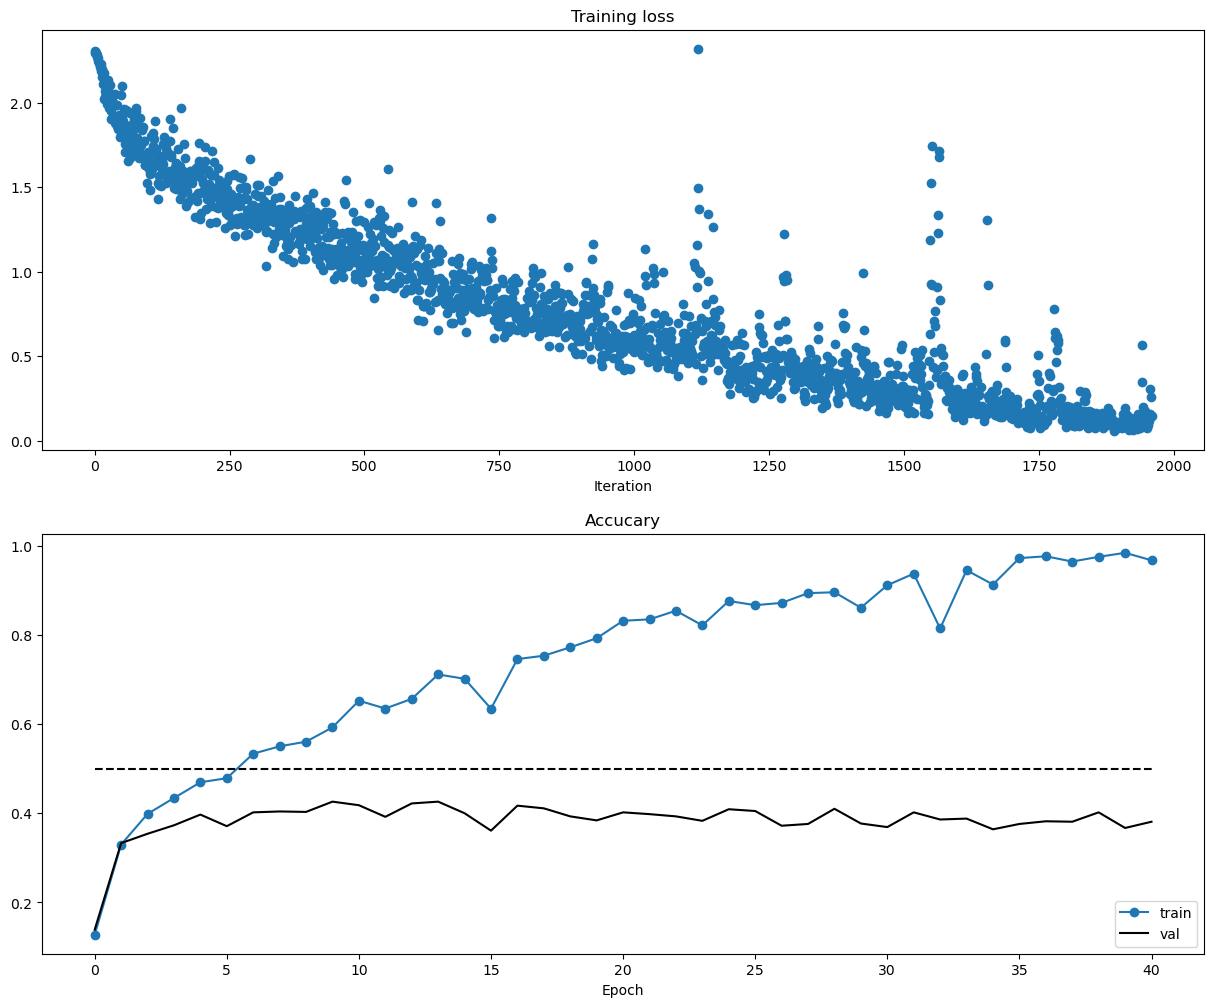

In [140]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accucary')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-0', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

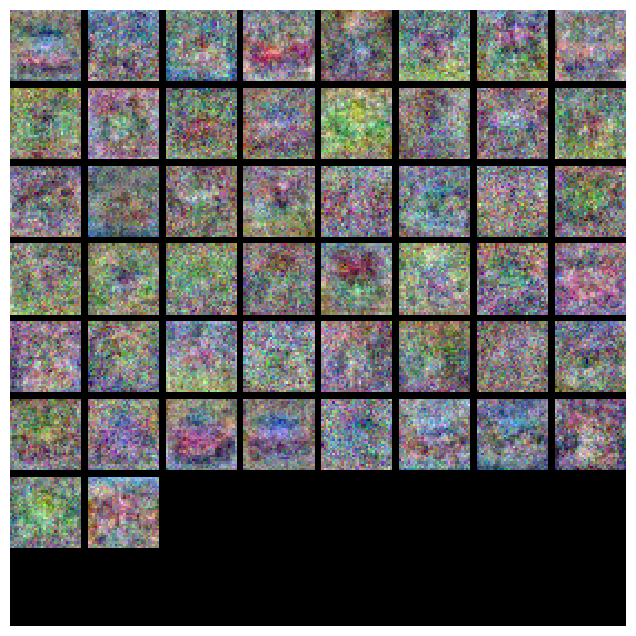

In [14]:
from vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params["W1"]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

In [25]:
results = {}
best_val = -1
best_model = None
best_hyperparams = None

num_folds = 40
input_size = 32 * 32 * 3
num_classes = 10
hidden_size = None

for i in range(num_folds):
    lr = 10 ** np.random.uniform(-1, -3)
    reg = 10 ** np.random.uniform(-2, -6)
    hidden_size = np.random.randint(4, 44) * 8
    model = TwoLayerNet(input_size, hidden_size, num_classes, reg=reg)
    solver = Solver(model, data, optim_config ={'learning_rate': lr},
                    num_epochs = 5, verbose = False)
    solver.train()
    results[(lr, reg, hidden_size)] = solver.best_val_acc

    if solver.best_val_acc > best_val:
        best_val = solver.best_val_acc
        best_model = model
        best_hyperparams = (lr, reg, hidden_size)

for lr, reg, hidden_size in sorted(results):
    val_accuracy = results[(lr, reg, hidden_size)]
    print('lr %e reg %e hidden size %i val accuracy: %f' % (lr, reg,hidden_size, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)



/Users/letunglam/Projects/deep-learning-training/minigrad/layers.py:107: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(probs[range(N), y]).sum() / N
/Users/letunglam/Projects/deep-learning-training/minigrad/layers.py:25: RuntimeWarning: overflow encountered in matmul
  out = x_reshaped @ w + b
/Users/letunglam/Projects/deep-learning-training/minigrad/layers.py:104: RuntimeWarning: invalid value encountered in subtract
  probs = np.exp(x - x.max(axis=1, keepdims=True))
/Users/letunglam/Projects/deep-learning-training/minigrad/layers.py:104: RuntimeWarning: overflow encountered in subtract
  probs = np.exp(x - x.max(axis=1, keepdims=True))
/Users/letunglam/Projects/deep-learning-training/minigrad/classifiers/fc_net.py:81: RuntimeWarning: overflow encountered in square
  loss += 0.5 * self.reg * (np.sum(W1**2) + np.sum(W2**2))
/opt/anaconda3/envs/cs224n/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return u

lr 1.131816e-03 reg 5.908200e-04 hidden size 200 val accuracy: 0.402000
lr 1.134411e-03 reg 4.291977e-05 hidden size 344 val accuracy: 0.404000
lr 1.214853e-03 reg 6.633310e-06 hidden size 176 val accuracy: 0.386000
lr 1.432337e-03 reg 1.336713e-03 hidden size 40 val accuracy: 0.390000
lr 1.530538e-03 reg 3.050742e-04 hidden size 296 val accuracy: 0.391000
lr 1.576657e-03 reg 4.845878e-06 hidden size 256 val accuracy: 0.384000
lr 1.624700e-03 reg 4.943224e-04 hidden size 304 val accuracy: 0.374000
lr 1.744356e-03 reg 2.913729e-04 hidden size 32 val accuracy: 0.358000
lr 2.042012e-03 reg 6.388975e-04 hidden size 136 val accuracy: 0.342000
lr 2.189807e-03 reg 4.975922e-05 hidden size 80 val accuracy: 0.351000
lr 2.616288e-03 reg 7.411030e-06 hidden size 184 val accuracy: 0.319000
lr 3.226608e-03 reg 1.290298e-06 hidden size 144 val accuracy: 0.314000
lr 3.305190e-03 reg 1.517213e-05 hidden size 272 val accuracy: 0.269000
lr 3.330388e-03 reg 1.367661e-04 hidden size 280 val accuracy: 0.28

In [21]:
best_hyperparams

(0.0012904192343936515, 3.0961441574498636, 248)

In [26]:
lr, reg, hidden_size = best_hyperparams

model = TwoLayerNet(input_size, hidden_size, num_classes, reg=reg)
solver = Solver(model, data, optim_config ={'learning_rate': lr},
                    num_epochs = 30, verbose = True)
solver.train()

(Iteration 1 / 1470) loss: 2.293366
(Epoch 0 / 30) train acc: 0.151224; val acc: 0.156000
(Iteration 11 / 1470) loss: 2.118521
(Iteration 21 / 1470) loss: 2.006190
(Iteration 31 / 1470) loss: 1.938860
(Iteration 41 / 1470) loss: 1.890316
(Epoch 1 / 30) train acc: 0.367347; val acc: 0.346000
(Iteration 51 / 1470) loss: 1.710260
(Iteration 61 / 1470) loss: 1.745174
(Iteration 71 / 1470) loss: 1.702684
(Iteration 81 / 1470) loss: 1.775688
(Iteration 91 / 1470) loss: 1.520913
(Epoch 2 / 30) train acc: 0.405102; val acc: 0.344000
(Iteration 101 / 1470) loss: 1.761668
(Iteration 111 / 1470) loss: 1.658458
(Iteration 121 / 1470) loss: 1.640251
(Iteration 131 / 1470) loss: 1.450683
(Iteration 141 / 1470) loss: 1.465718
(Epoch 3 / 30) train acc: 0.479796; val acc: 0.401000
(Iteration 151 / 1470) loss: 1.385202
(Iteration 161 / 1470) loss: 1.752583
(Iteration 171 / 1470) loss: 1.331970
(Iteration 181 / 1470) loss: 1.472427
(Iteration 191 / 1470) loss: 1.536144
(Epoch 4 / 30) train acc: 0.459796;

In [ ]:
best_model.save("best_two_layer_net.npy")

In [29]:
best_model = None


#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_model.                                                          #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on thexs previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

results = {}
best_val = -1

learning_rates = np.geomspace(3e-4, 3e-2, 3)
regularization_strengths = np.geomspace(1e-6, 1e-2, 5)

import itertools

for lr, reg in itertools.product(learning_rates, regularization_strengths):
    # Create Two Layer Net and train it with Solver
    model = TwoLayerNet(hidden_dim=128, reg=reg)
    solver = Solver(model, data, optim_config={'learning_rate': lr}, num_epochs=10, verbose=False)
    solver.train()
    
    # Compute validation set accuracy and append to the dictionary
    results[(lr, reg)] = solver.best_val_acc

    # Save if validation accuracy is the best
    if results[(lr, reg)] > best_val:
        best_val = results[(lr, reg)]
        best_model = model

# Print out results.
for lr, reg in sorted(results):
    val_accuracy = results[(lr, reg)]
    print('lr %e reg %e val accuracy: %f' % (lr, reg, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 3.000000e-04 reg 1.000000e-06 val accuracy: 0.390000
lr 3.000000e-04 reg 1.000000e-05 val accuracy: 0.391000
lr 3.000000e-04 reg 1.000000e-04 val accuracy: 0.391000
lr 3.000000e-04 reg 1.000000e-03 val accuracy: 0.377000
lr 3.000000e-04 reg 1.000000e-02 val accuracy: 0.387000
lr 3.000000e-03 reg 1.000000e-06 val accuracy: 0.339000
lr 3.000000e-03 reg 1.000000e-05 val accuracy: 0.305000
lr 3.000000e-03 reg 1.000000e-04 val accuracy: 0.343000
lr 3.000000e-03 reg 1.000000e-03 val accuracy: 0.318000
lr 3.000000e-03 reg 1.000000e-02 val accuracy: 0.293000
lr 3.000000e-02 reg 1.000000e-06 val accuracy: 0.109000
lr 3.000000e-02 reg 1.000000e-05 val accuracy: 0.176000
lr 3.000000e-02 reg 1.000000e-04 val accuracy: 0.121000
lr 3.000000e-02 reg 1.000000e-03 val accuracy: 0.125000
lr 3.000000e-02 reg 1.000000e-02 val accuracy: 0.156000
best validation accuracy achieved during cross-validation: 0.391000
